# Most Popular Weapons/Utility

In [42]:
#imports of required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
#loading of dataset
df = pd.read_csv('./data/csgo_round_snapshots_processed.csv', sep=',')
df_buyable_info = pd.read_csv('./data/csgo_byuable_to_category_nickname.csv', sep=',')
nickname_to_name = df_buyable_info.set_index('nickname').to_dict()['name']

In [44]:
pd.set_option('display.max_columns', None)

In [45]:
#exploring data
df.head(10)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,t_weapon_glock_price,t_category_pistol_price,t_category_pistol_amount,t_overall_investment,ct_weapon_usps_price,ct_category_pistol_price,ct_category_pistol_amount,ct_overall_investment,ct_weapon_p2000_price,t_kevlar_price,t_kevlarhelmet_price,t_category_armor_price,ct_kevlar_price,ct_kevlarhelmet_price,ct_category_armor_price,t_grenade_smokegrenade_price,t_category_grenade_price,t_category_grenade_amount,ct_defuse_kits_price,t_weapon_p2000_price,ct_weapon_famas_price,ct_category_rifle_price,ct_category_rifle_amount,ct_weapon_ssg08_price,ct_category_sniper_price,ct_category_sniper_amount,ct_weapon_ump45_price,ct_category_smg_price,ct_category_smg_amount,ct_grenade_hegrenade_price,ct_category_grenade_price,ct_category_grenade_amount,ct_grenade_flashbang_price,ct_grenade_smokegrenade_price,ct_grenade_incendiarygrenade_price,t_weapon_famas_price,t_category_rifle_price,t_category_rifle_amount,t_weapon_ak47_price,ct_weapon_awp_price,ct_weapon_m4a4_price,t_grenade_flashbang_price,t_grenade_molotovgrenade_price,t_grenade_decoygrenade_price,t_weapon_awp_price,t_category_sniper_price,t_category_sniper_amount,ct_weapon_deagle_price,t_grenade_hegrenade_price,ct_weapon_ak47_price,t_weapon_galilar_price,t_weapon_mac10_price,t_category_smg_price,t_category_smg_amount,t_weapon_m4a4_price,t_weapon_deagle_price,ct_weapon_aug_price,t_grenade_incendiarygrenade_price,t_weapon_p250_price,ct_weapon_p250_price,t_weapon_aug_price,t_weapon_cz75auto_price,t_weapon_sg553_price,ct_weapon_sg553_price,ct_weapon_m4a1s_price,t_weapon_usps_price,ct_weapon_cz75auto_price,t_weapon_ssg08_price,ct_weapon_mp5sd_price,ct_grenade_molotovgrenade_price,t_weapon_m4a1s_price,ct_grenade_decoygrenade_price,ct_weapon_mp9_price,ct_weapon_fiveseven_price,t_weapon_ump45_price,ct_weapon_mac10_price,ct_weapon_galilar_price,t_weapon_fiveseven_price,ct_weapon_glock_price,t_weapon_tec9_price,ct_weapon_mag7_price,ct_category_shotgun_price,ct_category_shotgun_amount,t_weapon_mp9_price,t_weapon_mag7_price,t_category_shotgun_price,t_category_shotgun_amount,t_weapon_elite_price,t_weapon_g3sg1_price,ct_weapon_elite_price,ct_weapon_tec9_price,ct_weapon_xm1014_price,t_weapon_p90_price,ct_weapon_scar20_price,ct_weapon_nova_price,t_weapon_mp7_price,t_weapon_sawedoff_price,ct_weapon_mp7_price,t_weapon_mp5sd_price,t_weapon_bizon_price,t_weapon_nova_price,t_weapon_xm1014_price,t_weapon_scar20_price,t_weapon_r8revolver_price,t_weapon_negev_price,t_category_machine gun_price,t_category_machine gun_amount

In [47]:
weapons = ['ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon',
           't_weapon_bizon','ct_weapon_cz75auto', 't_weapon_cz75auto','ct_weapon_elite', 't_weapon_elite', 'ct_weapon_famas',
           't_weapon_famas','ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar', 't_weapon_galilar', 'ct_weapon_glock',
           't_weapon_glock', 'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s', 'ct_weapon_m4a4', 
           't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 
           't_weapon_mp5sd', 'ct_weapon_mp7', 't_weapon_mp7','ct_weapon_mp9', 't_weapon_mp9', 'ct_weapon_negev', 
           't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova',  'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver',
           't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff', 'ct_weapon_scar20', 't_weapon_scar20', 
           'ct_weapon_sg553', 't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08', 'ct_weapon_ump45', 't_weapon_ump45',
           'ct_weapon_xm1014', 't_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle', 'ct_weapon_fiveseven',
           't_weapon_fiveseven', 'ct_weapon_usps', 't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 't_weapon_p2000',
           't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9', 'ct_grenade_hegrenade', 't_grenade_hegrenade',
           'ct_grenade_flashbang', 't_grenade_flashbang', 'ct_grenade_smokegrenade', 't_grenade_smokegrenade',
           'ct_grenade_incendiarygrenade', 't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade', 't_grenade_molotovgrenade',
           'ct_grenade_decoygrenade', 't_grenade_decoygrenade']

# separate pisto, greanades, and wepon column (excluding pistols) names into separate variables
pistol_nicknames = df_buyable_info.loc[df_buyable_info['category'] == 'pistol', 'nickname'].tolist()
pistol_columns = [x for x in weapons if x.split('_')[-1] in pistol_nicknames]

grenade_nicknames = df_buyable_info.loc[df_buyable_info['category'] == 'grenade', 'nickname'].tolist()
grenade_columns = [x for x in weapons if x.split('_')[-1] in grenade_nicknames]

other_weap_columns = [x for x in weapons if (x not in pistol_columns) & (x not in grenade_columns)] 

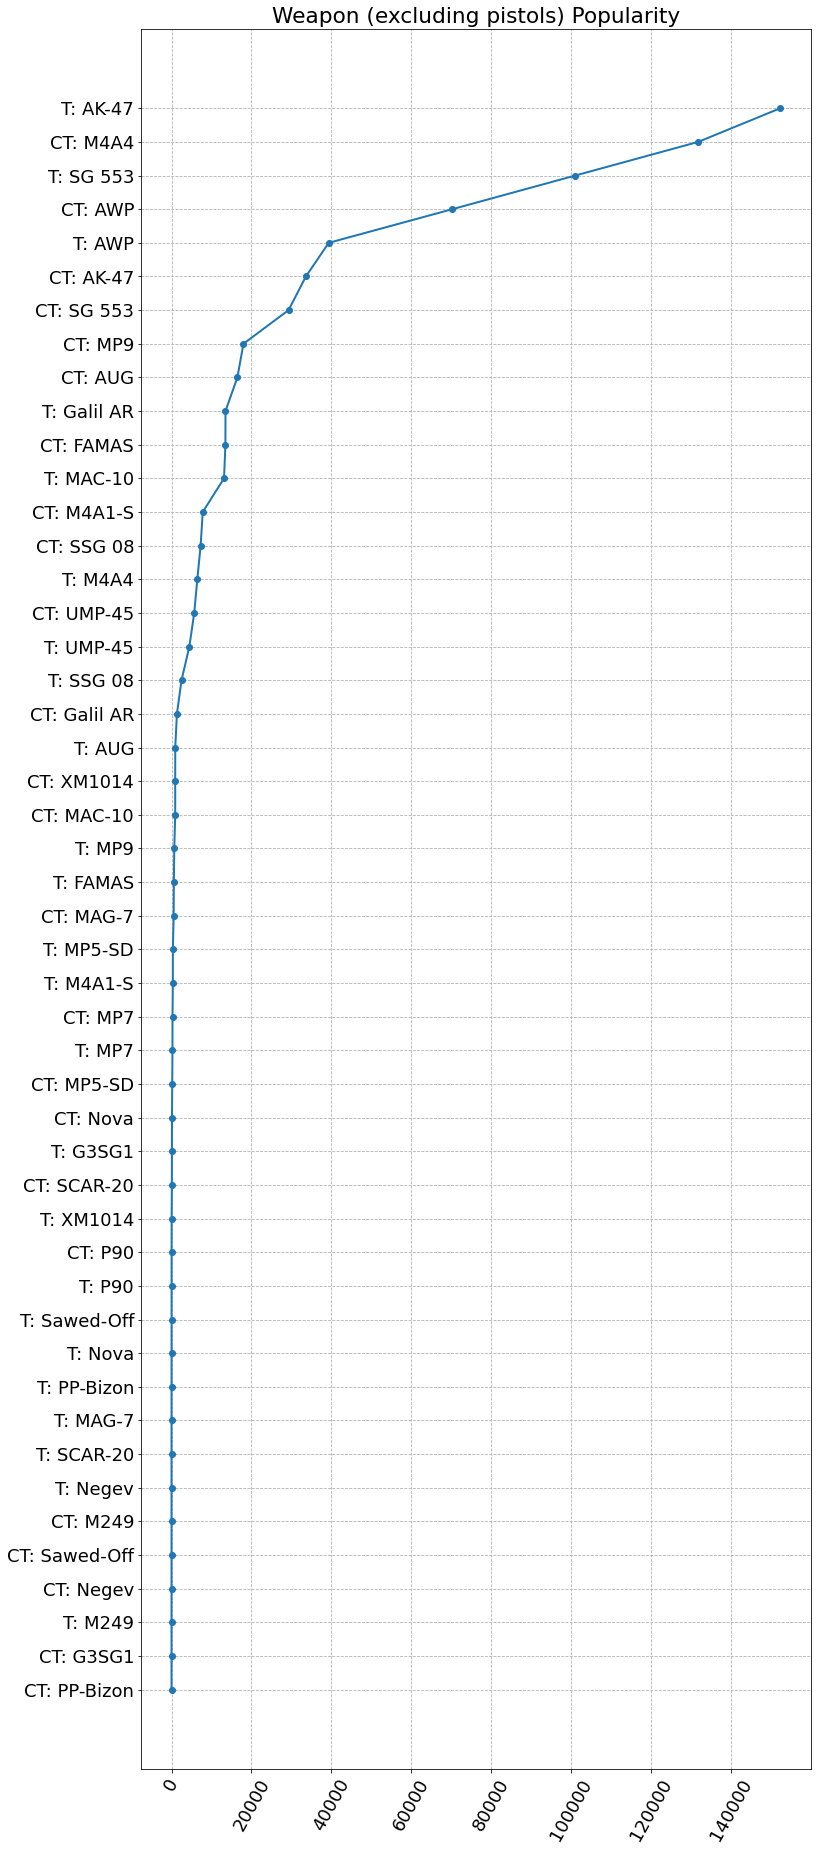

In [121]:
# set up variables
outs = [0]*len(other_weap_columns)
weapons = other_weap_columns[:]

# get weapon counts
for i in range(0, len(weapons)):
    outs[weapons.index(weapons[i])] = sum(df[weapons[i]])

# set weapon name and count
for i in range(0, len(weapons)):
    weapons[i] = [weapons[i], outs[i]]

weapons.sort(key=lambda xx: xx[1], reverse=False)

x = []
y = []

for i in range(0, len(weapons)):
    x.append(weapons[i][0])
    y.append(weapons[i][1])
    
plt.rcParams["figure.figsize"] = (12, 32)
plt.rcParams["font.size"] = 18
    
#plotting the most popular weapons
plt.title("Weapon (excluding pistols) Popularity")
plt.grid(linestyle="--")
plt.xticks(rotation=61)
# plot line, make labels better readable
plt.plot(y, [f"{xx.split('_')[0].upper()}: {nickname_to_name[xx.split('_')[-1]]}" for xx in x], linewidth=2, marker="o")
plt.savefig('./outputs/weapon_popularity.png', facecolor='white', bbox_inches='tight')
plt.show()

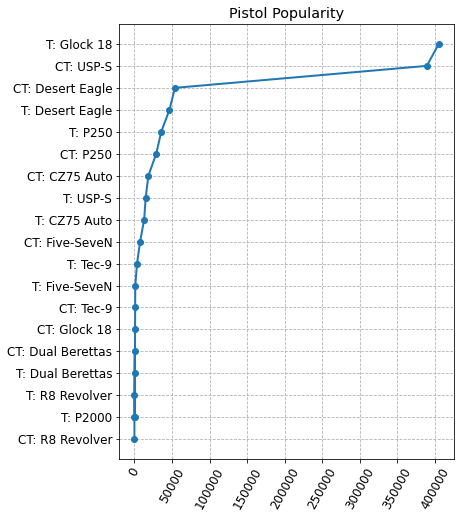

In [118]:
outs = [0]*len(pistol_columns)
pistols = pistol_columns[:]

for i in range(0, len(pistols)):
    outs[pistols.index(pistols[i])] = sum(df[pistols[i]])
   
for i in range(0, len(pistols)):
    pistols[i] = [pistols[i], outs[i]]

pistols.sort(key=lambda xx: xx[1], reverse=False)

x = []
y = []

for i in range(0, len(pistols)):
    x.append(pistols[i][0])
    y.append(pistols[i][1])
    
plt.rcParams["figure.figsize"] = (6, 8)
plt.rcParams["font.size"] = 12
    
#plotting the most popular weapons
plt.title("Pistol Popularity")
plt.grid(linestyle="--")
plt.xticks(rotation=61)
plt.plot(y, [f"{xx.split('_')[0].upper()}: {nickname_to_name[xx.split('_')[-1]]}" for xx in x], linewidth=2, marker="o")
plt.savefig('./outputs/pistol_popularity.png', facecolor='white', bbox_inches='tight')
plt.show()

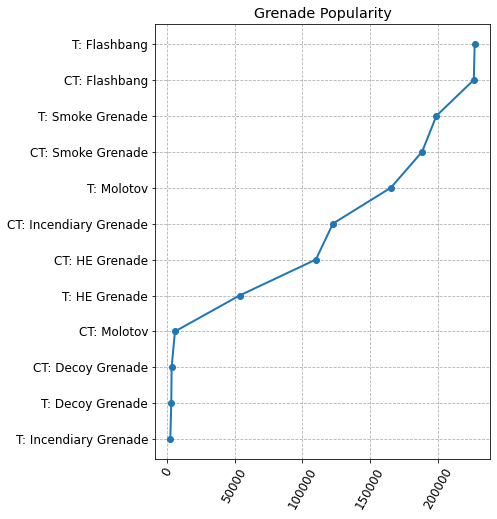

In [119]:
outs = [0]*len(grenade_columns)
grenades = grenade_columns[:]

for i in range(0, len(grenades)):
    outs[grenades.index(grenades[i])] = sum(df[grenades[i]])
   
for i in range(0, len(grenades)):
    grenades[i] = [grenades[i], outs[i]]

grenades.sort(key=lambda xx: xx[1], reverse=False)

x = []
y = []

for i in range(0, len(grenades)):
    x.append(grenades[i][0])
    y.append(grenades[i][1])
    
plt.rcParams["figure.figsize"] = (6, 8)
plt.rcParams["font.size"] = 12
    
#plotting the most popular weapons
plt.title("Grenade Popularity")
plt.grid(linestyle="--")
plt.xticks(rotation=61)
plt.plot(y, [f"{xx.split('_')[0].upper()}: {nickname_to_name[xx.split('_')[-1]]}" for xx in x], linewidth=2, marker="o")
plt.savefig('./outputs/grenade_popularity.png', facecolor='white', bbox_inches='tight')
plt.show()